In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
# Load the dataset
data = pd.read_csv('bank-loan.csv')

In [7]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [9]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [10]:
# Step 1.1: Handling Missing Values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64


In [11]:
# Since 'default' is the target variable, let's drop rows with missing 'default' values
data = data.dropna(subset=['default'])

In [12]:
# Step 1.2: Encode categorical variables if needed (e.g., education levels)
# Let's assume 'ed' represents education level and is categorical
if data['ed'].dtype == 'object':
    data['ed'] = LabelEncoder().fit_transform(data['ed'])

In [13]:
# Step 1.3: Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

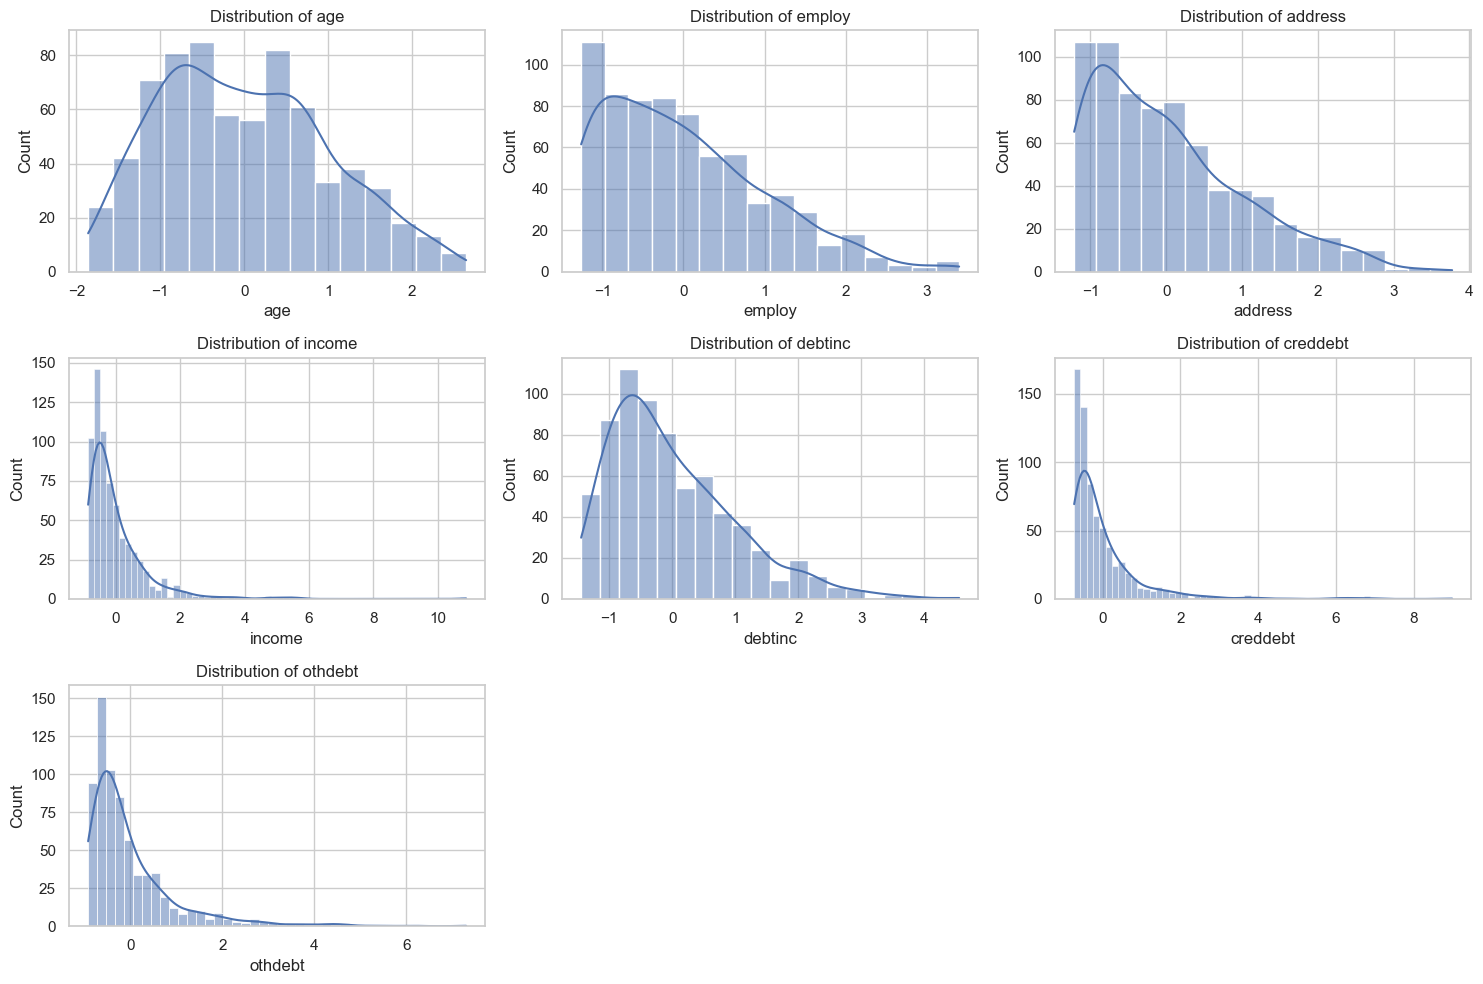

In [16]:
# Univariate analysis - Distribution plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    # Adjust to a 3x3 grid layout to fit up to 9 plots
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


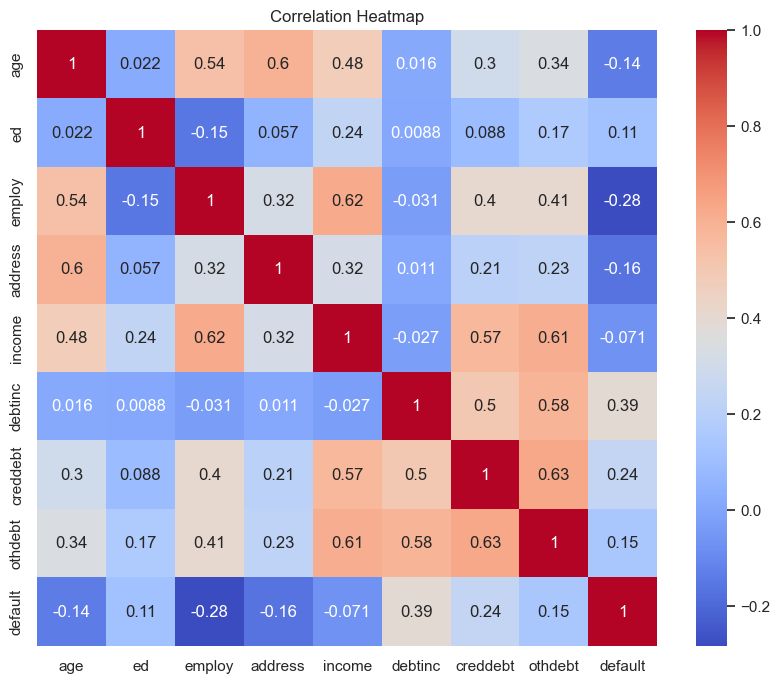

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Define features and target
target = 'default'
X = data.drop(columns=[target])
y = data[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Define features and target
target = 'default'
X = data.drop(columns=[target])
y = data[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Dictionary to hold best models
best_models = {}

for model_name, param_grid in param_grids.items():
    if model_name == 'LogisticRegression':
        model = LogisticRegression()
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_name == 'SVC':
        model = SVC()
    elif model_name == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier()

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate each best model
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}")
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print("Confusion Matrix:\n", conf_matrix)



Evaluating LogisticRegression
Accuracy: 0.85
Precision: 0.81
Recall: 0.58
F1 Score: 0.68
Confusion Matrix:
 [[97  5]
 [16 22]]

Evaluating RandomForestClassifier
Accuracy: 0.80
Precision: 0.71
Recall: 0.45
F1 Score: 0.55
Confusion Matrix:
 [[95  7]
 [21 17]]

Evaluating SVC
Accuracy: 0.86
Precision: 0.95
Recall: 0.53
F1 Score: 0.68
Confusion Matrix:
 [[101   1]
 [ 18  20]]

Evaluating GradientBoostingClassifier
Accuracy: 0.85
Precision: 0.84
Recall: 0.55
F1 Score: 0.67
Confusion Matrix:
 [[98  4]
 [17 21]]


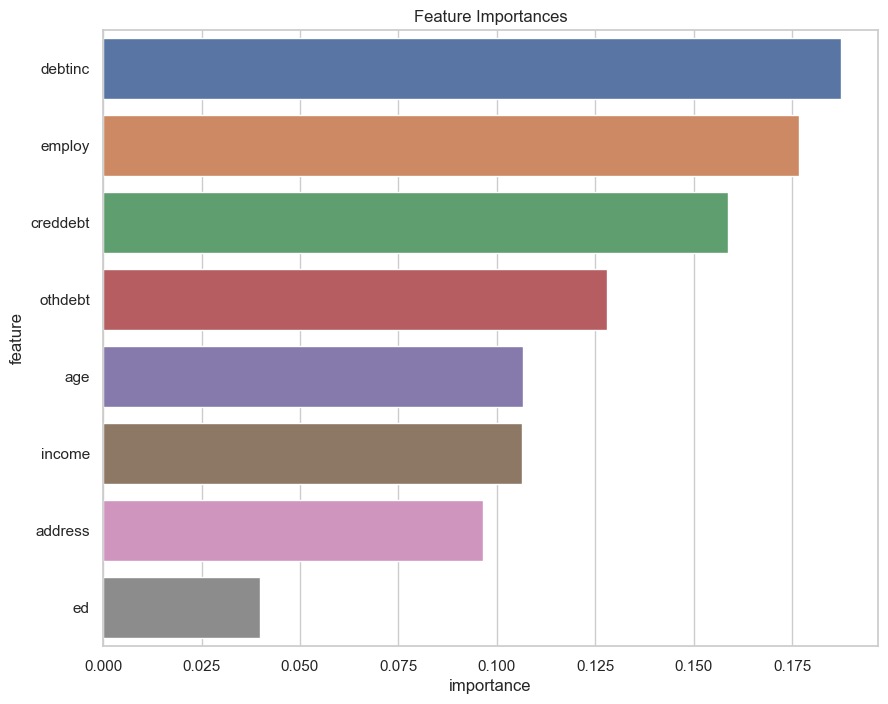

In [23]:
# Feature importance from Random Forest
importances = best_models['RandomForestClassifier'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.show()
